# Chapter 07. 선형회귀의 기초
## 04. 경사하강법으로 선형회귀 풀기
### 1 - 경사하강법의 개념
- 경사하강법(gradient descent) : 경사를 하강하면서 수식을 최소화하는 매개변수의 값을 찾아내는 방법
    - 컴퓨터가 최적의 지점을 찾아낼 때 가장 많이 사용하는 방법

- 수식에 경사하강법을 적용하면 점이 최솟값을 달성하는 방향으로 점점 내려감
    - 이 때 경사하강법에서 두 가지 확인 필요
        - 1. 경사하강법을 몇 번 적용할 것인가?
            - 많이 실행하면 할 수록 점점 최솟값에 가까워짐
        - 2. 한 번에 얼마나 많이 내려갈 것인가?
            - 한 번에 얼마나 많은 공간을 움직일지에 대한 값을 기울기(경사, = gradient)라 부름
                - 경사하강법의 하이퍼 매개변수라고도 함

### 2 - 경사하강법 알고리즘
- 예시로 $f(x) = x^2$을 사용
    - $f(x) = x^2 \rightarrow \frac{dy}{dx} = 2x$
    - 위 식에 대한 경사하강법의 가장 기본적인 수식은 아래와 같음
        - $x_{new} = x_{old} - \alpha \times (2x_{old})$
            - $x_{old}$ : 현재 $x$값
            - $x_{new}$ : 경사 값이 적용된 후 생성된 값
    - 경사하강법은 바로 이 경사만큼의 변화가 계속 $x$에 적용되어 $x$의 최솟값을 찾는 형태
        - 찾으려는 값에 대해 반복적으로 미분 값을 적용
            - 더 이상 값이 변하지 않거나 변화가 미미해지는 지점까지 값이 줄어듦

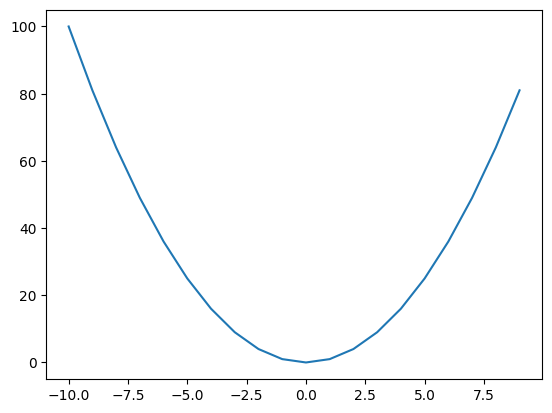

In [1]:
# 위 과정을 함수로 표현
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

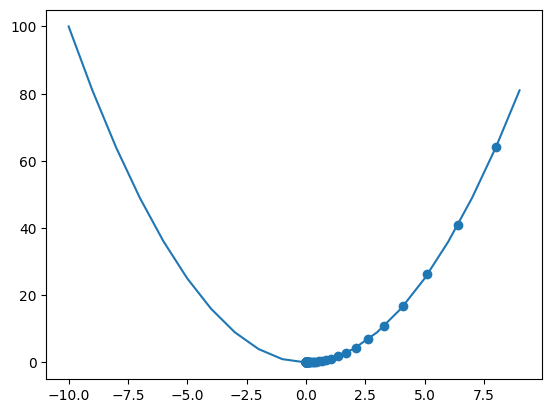

In [2]:
x_new = 10
derivative = []
y = []
learng_rate = 0.1

for i in range(100) :
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate * 2 * old_value
    y.append(x_new ** 2)

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

- 경사하강법을 안정적으로 사용하기 위해 학습에 의해서가 아닌 알고리즘을 개발하는 개발자에 의해 다음이 결정되어야 함
    - 학습률(learning rate)을 얼마로 할 것인가?
        - 앞 수식에서 $\alpha$값을 결정하는 것
        - 너무 작은 값은 많은 반복을 적용해도 원하는 최적값을 찾지 못하는 경우 발생
        - 너무 큰 값은 발산이 발생
    - 얼마나 많은 반복(iteration)으로 돌릴 것인가?
        - 반복 횟수가 충분하지 않으면 최솟값을 찾지 못하는 경우 발생
        - 반복 횟수가 많으면 필요 없는 시간을 허비할 가능성 발생

### 3 - 경사하강법으로 선형회귀 풀기
- $J(w_0, w_1) = \frac{1}{2m} \displaystyle\sum_{i=1}^m (w_1x^{(i)} + w_0 - y^{(i)})^2$
    - 비용함수($w_0, w_1$두 변수의 제곱항에 관한 이차항)
- 위 수식에서는 J를 최소화하는 방향으로 학습을 실행해야 함
    - 그 시점에서의 $w_0, w_1$을 찾는 것이 목표
    - 변수 w가 2개 있기 때문에 평면좌표로는 비용함수 $J$를 표현하기 힘듦
        - 따라서 3차원 그래프 형태로 $J$를 표현해야 함
            - $w_0, w_1$은 $x, y$축, $J$는 $z$축에 표현

- 학습을 실행하는 과정에서 두 개의 매개변수 $w_0, w_1$에 대한 업데이트를 수행해야 함
    - 임의의 $w_0, w_1$값 지정
    - 비용함수 $J$가 최소화 될 때까지 반복을 수행
    - 비용함수가 더 이상 줄어들지 않거나 정해진 반복이 종료되면 학습 종료
    - 아래에서 수식 $\theta_j$는 각각 $w_0, w_1$로 변환되어 연산이 일어남
        - loop until covergence{do $\theta_j : = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)}
            - $\frac{\partial J}{\partial w_0} = \frac{1}{m} \displaystyle\sum_{i=1}^m (w_1x^{(i)} + w_0 - y^{(i)})$
            - $\frac{\partial J}{\partial w_1} = \frac{1}{m} \displaystyle\sum_{i=1}^m (w_1x^{(i)} + w_0 - y^{(i)})x^{(i)}$
    - 위 수식에서 가장 중요한 것은 $w_0$과 $w_1$의 업데이트가 동시에(simultaneously) 일어난다는 것
        - 수식에서 보면 먼저 $w_0$가 업데이트 되고 다음으로 $w_1$이 업데이트 됨
        - 이 때 반복(iteration)에서는 이미 업데이트 된 $w_0$와 $w_1$에 서로 영향을 주지 않음
            - $w_1$업데이트에서 사용되는 $w_0$값은 $w_{0_{old}}$값으로 이해해야 함
            - 하나의 반복 안에서는 서로 간의 값에 영향을 주지 않는 것이 바로 동시적으로 업데이트 된다는 의미

- 선형회귀 문제를 경사하강법으로 풀기 위해서는 실험을 진행하는 사람이 학습률과 반복 횟수를 직접 입력해야 함
- 또한 피쳐가 많으면 상대적으로 표준방정식(normal equation) 기법에 비해 학습이 원활하게 일어남
- 하지만 때에 따라서는 최적값이 수렴되지 않는 문제점을 만날 수도 있음